In [1]:
import pandas as pd
import numpy as np
import bitmexData 
import matplotlib.pyplot as plt
import os

# Load the Data from CSV

In [3]:
sentiment = pd.read_csv('augmento_assignment_data.csv').set_index('date')
sentiment.index = pd.to_datetime(sentiment.index)

# Get the Data from API


In [5]:
# need max amount of points is about 12000. Need to run twice to get data
year1 = bitmexData.hourly('2016-11-01','2018-03-07','XBTUSD')
df1 = year1.get_data_all()
year2 = bitmexData.hourly('2018-03-07','2019-03-08','XBTUSD')
df2 = year2.get_data_all()

Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loaded.
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loading...
Data loaded.


In [6]:
data1 = pd.DataFrame(df1)
data2 = pd.DataFrame(df2)
df = pd.concat([data1,data2],axis=0)

In [7]:
# df[df.duplicated()]
# remove duplicates
data = df.drop_duplicates().set_index('timestamp')
data.index = pd.to_datetime(data.index)

# Find the ratio of positive to negative sentiment

In [8]:
# add 1 to numerator and denominator to account for 0/0 and x/0

sentiment["ratio_pn"]=(sentiment["Positive"]+1)/(sentiment["Negative"]+1)
sentiment["dif"]=(sentiment["Positive"])-(sentiment["Negative"])

# Standardize time series

Since you mentioned "stationarity," I assume you meant percentage change of the <b>Close</b> data.
<br>
<b>Stationarity</b>: mean and variance constant over time

<b>Normal Way</b>
<br>
y = (x - mean) / standard_deviation
<br>
mean = sum(x) / count(x)
<br>
<i>Assumes constant std</i>

<b>Another Method</b>
<br>
Rolling Window
<br>
<i>std is adjusted depending on the window</i>



NameError: name 'h1' is not defined

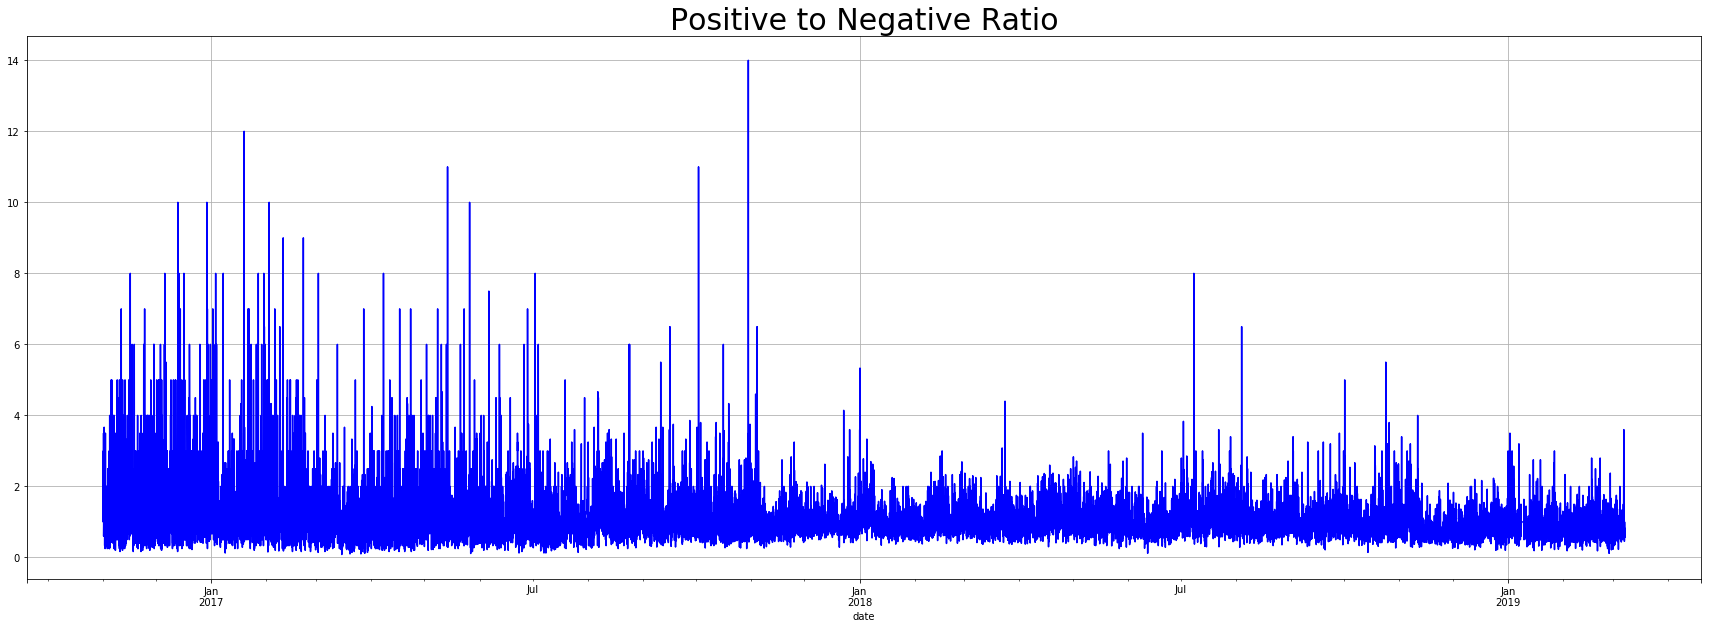

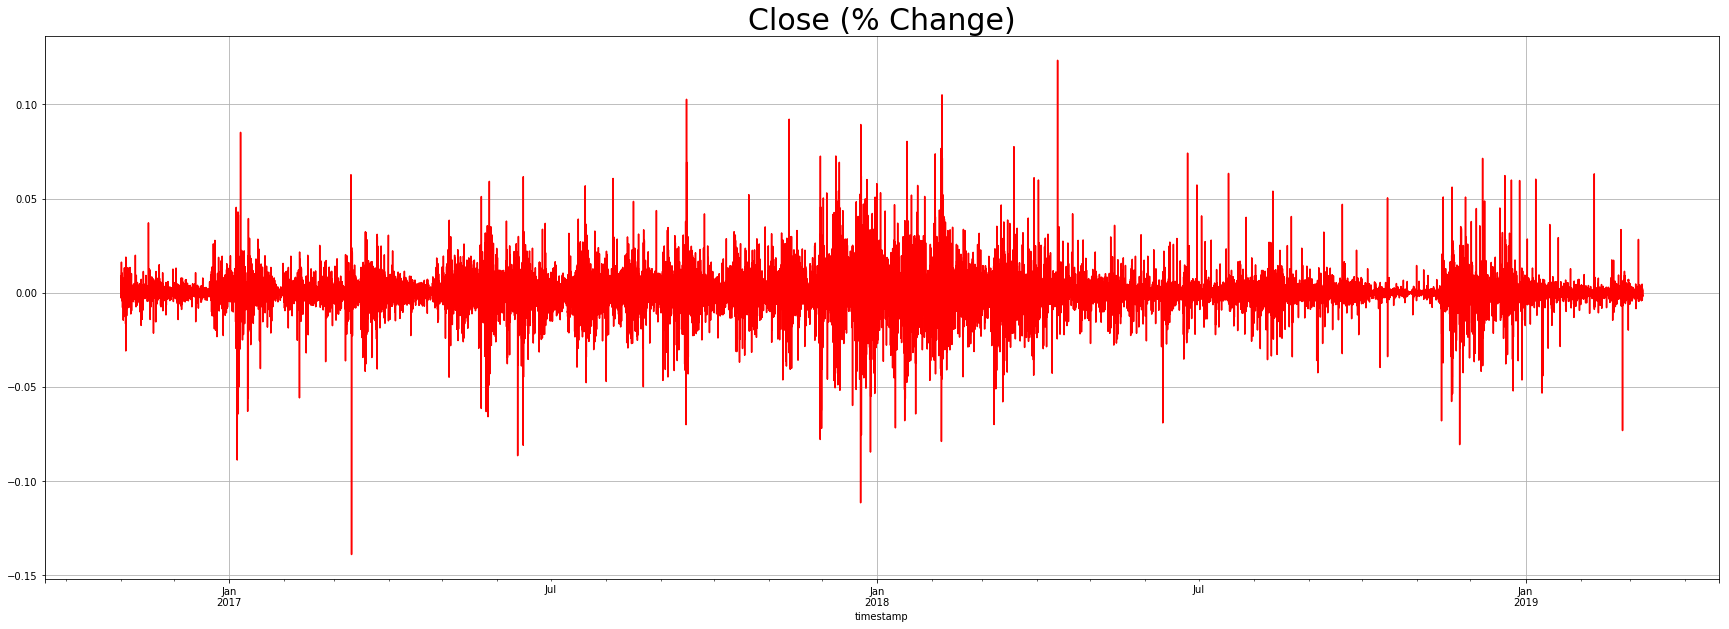

In [9]:
plt.figure(figsize=(30,10))
plt.title('Positive to Negative Ratio', fontsize=30)
ax1 = sentiment.ratio_pn.plot(color='blue', grid=True)
plt.figure(figsize=(30,10))
plt.title('Close (% Change)', fontsize=30)
ax1 = (data.close).pct_change().plot(color='red', grid=True)

#h1, l1 = ax1.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)
plt.show()

### First Method

Somewhat resembles it. Problem, mean and std constant

In [13]:
m1 = ((sentiment["ratio_pn"]-sentiment["ratio_pn"].mean())/sentiment["ratio_pn"].std())
m1 = m1.rename("stat_ratio_pn")

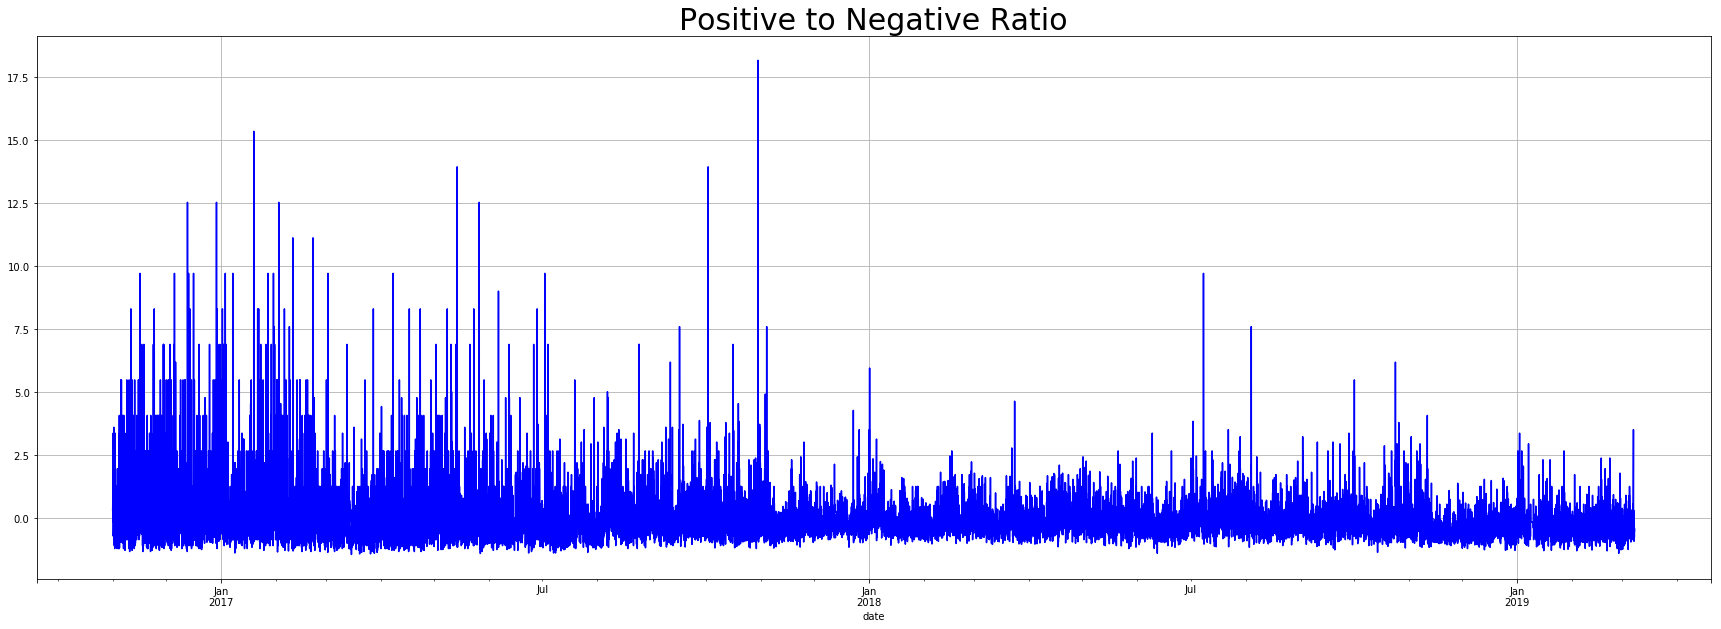

In [14]:
plt.figure(figsize=(30,10))
plt.title('Positive to Negative Ratio', fontsize=30)
ax1 = m1.plot(color='blue', grid=True)

plt.show()

/Users/hoangluong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
/Users/hoangluong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


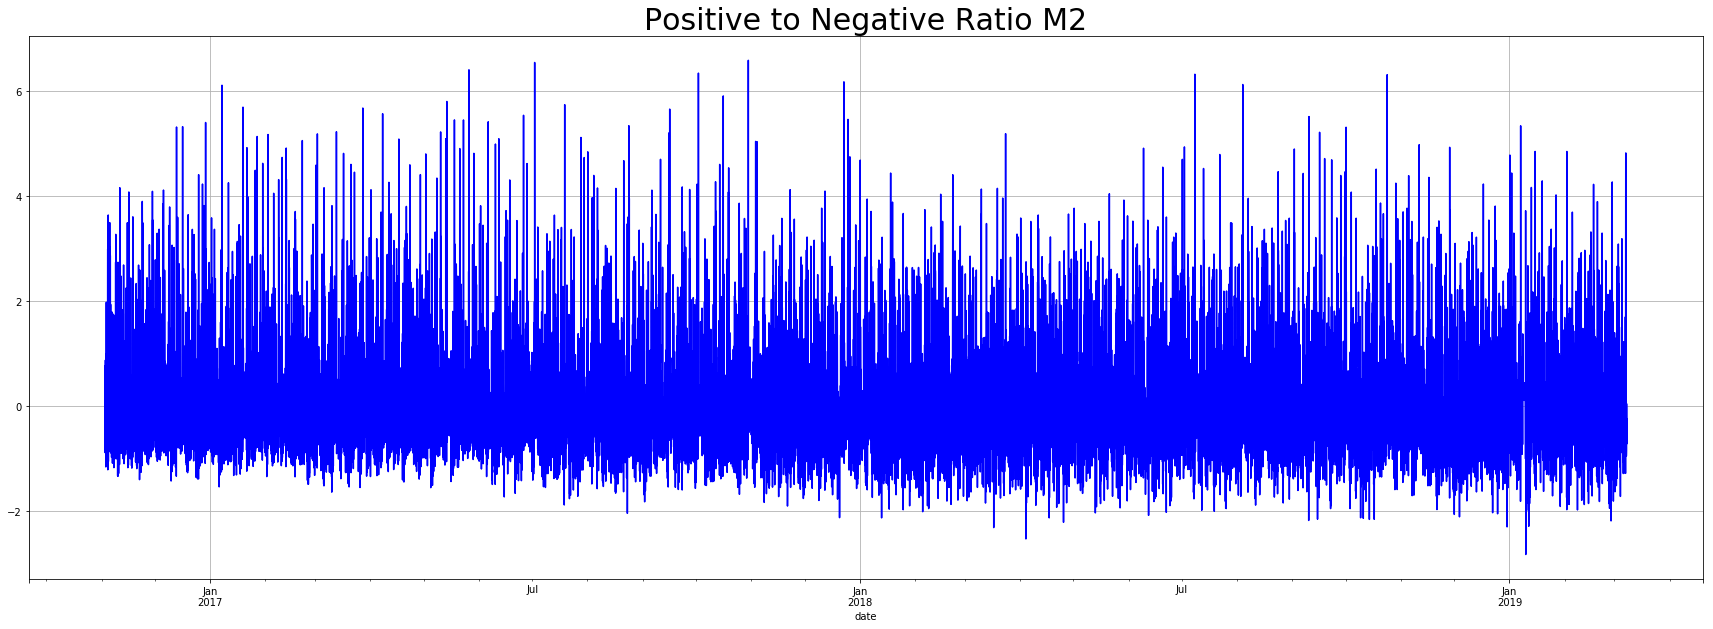

In [15]:
win=2*24
mean = pd.Series(sentiment["ratio_pn"]).rolling(window=win).apply(lambda x : np.mean(x))
std = pd.Series(sentiment["ratio_pn"]).rolling(window=win).apply(lambda x : np.std(x))
m2 =  (pd.Series(sentiment["ratio_pn"])-mean)/std
m2 = m2.rename("stat_ratio_pn")
plt.figure(figsize=(30,10))
plt.title('Positive to Negative Ratio M2', fontsize=30)
ax1 = m2.plot(color='blue', grid=True)

plt.show()

In [16]:
rc = pd.merge(pd.DataFrame((data.close).pct_change()), pd.DataFrame(m2), left_index=True, right_index=True).dropna()


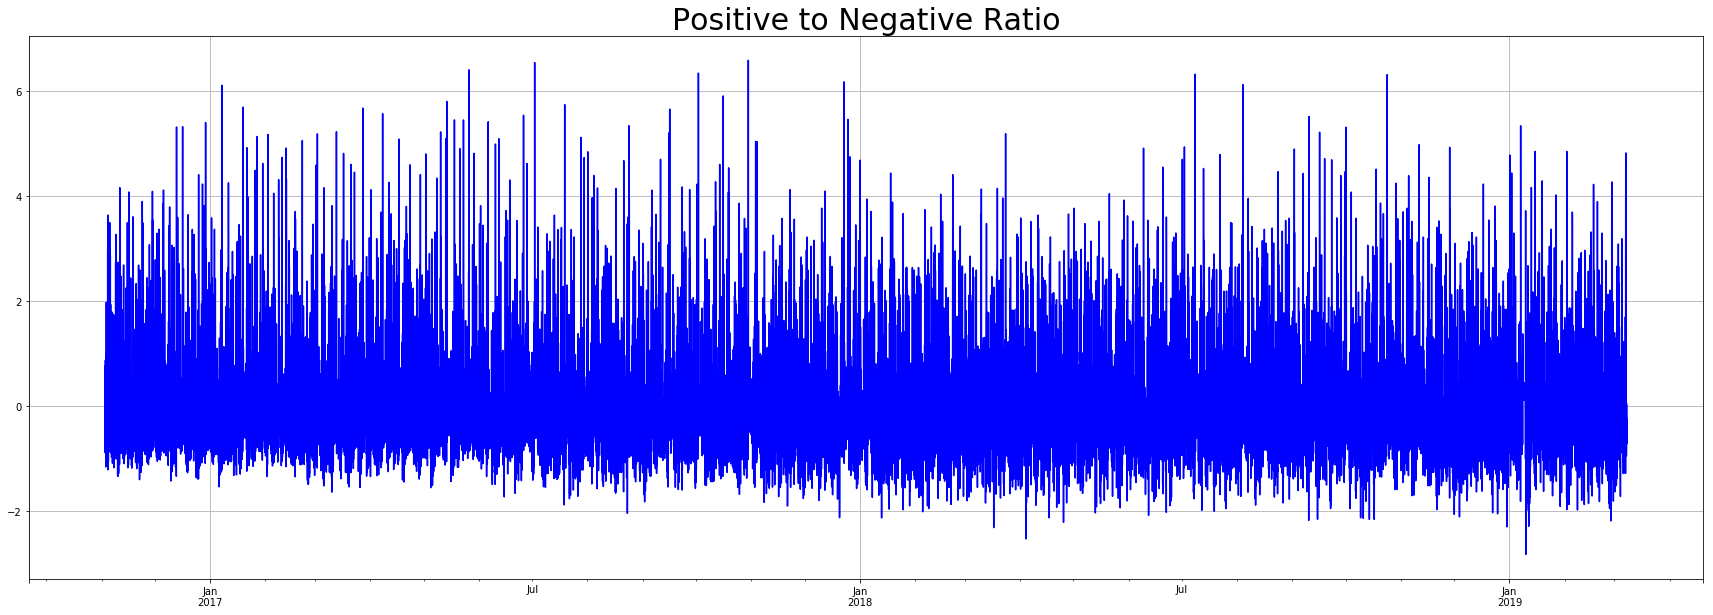

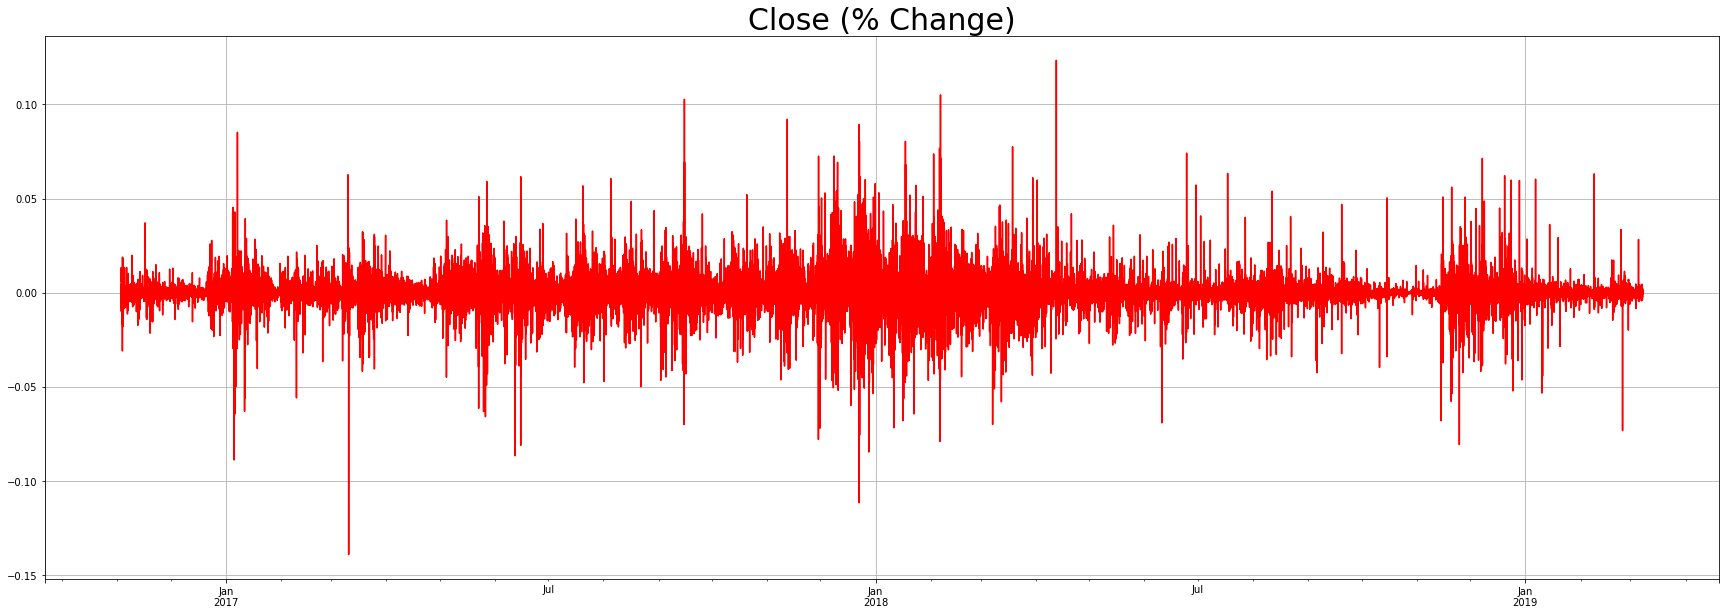

In [17]:
plt.figure(figsize=(30,10))
plt.title('Positive to Negative Ratio', fontsize=30)
ax1 = rc.stat_ratio_pn.plot(color='blue', grid=True)
plt.figure(figsize=(30,10))
plt.title('Close (% Change)', fontsize=30)
ax1 = (rc.close).plot(color='red', grid=True)

#h1, l1 = ax1.get_legend_handles_labels()

plt.show()

# Correlation

In [18]:
rc.corr()

,close,stat_ratio_pn
close,1.000000,0.070634
stat_ratio_pn,0.070634,1.000000


# Other Metrics

difference between negative and positive sentiment

/Users/hoangluong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.
/Users/hoangluong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


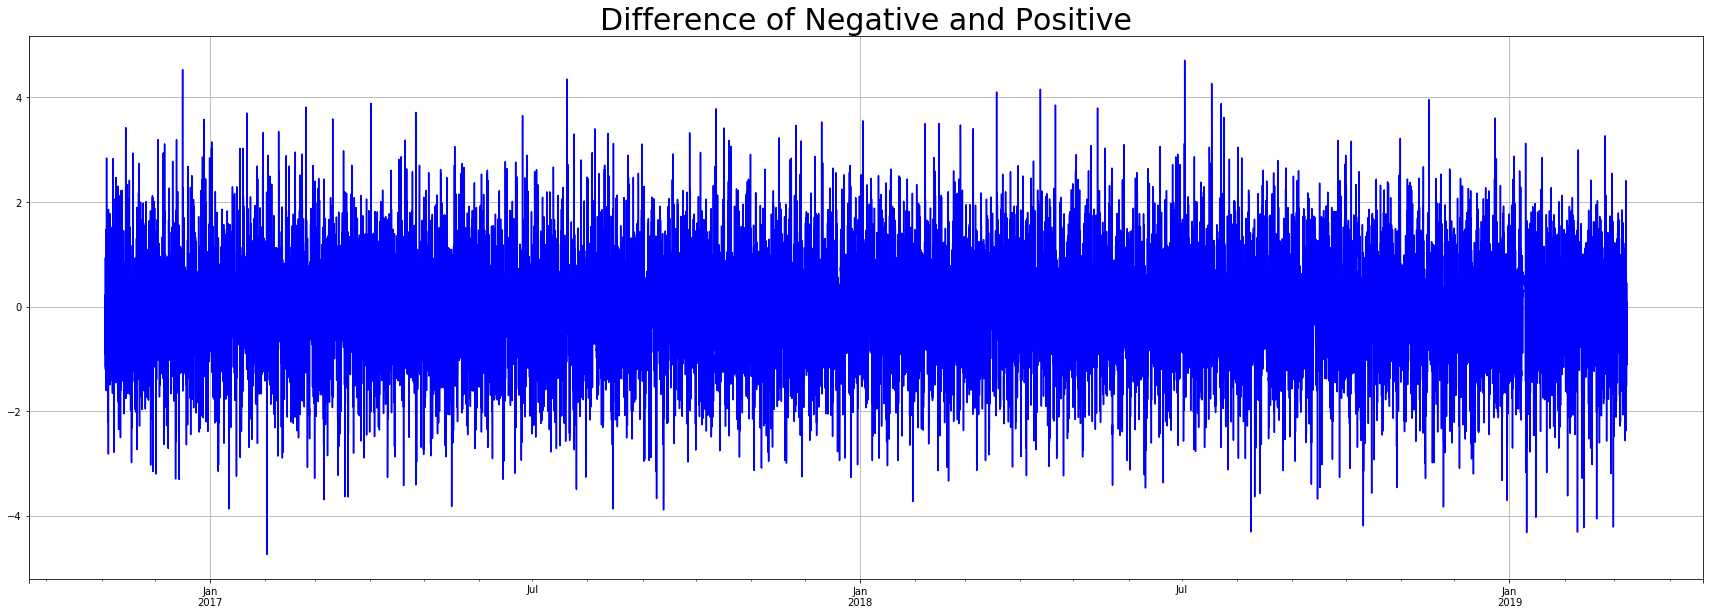

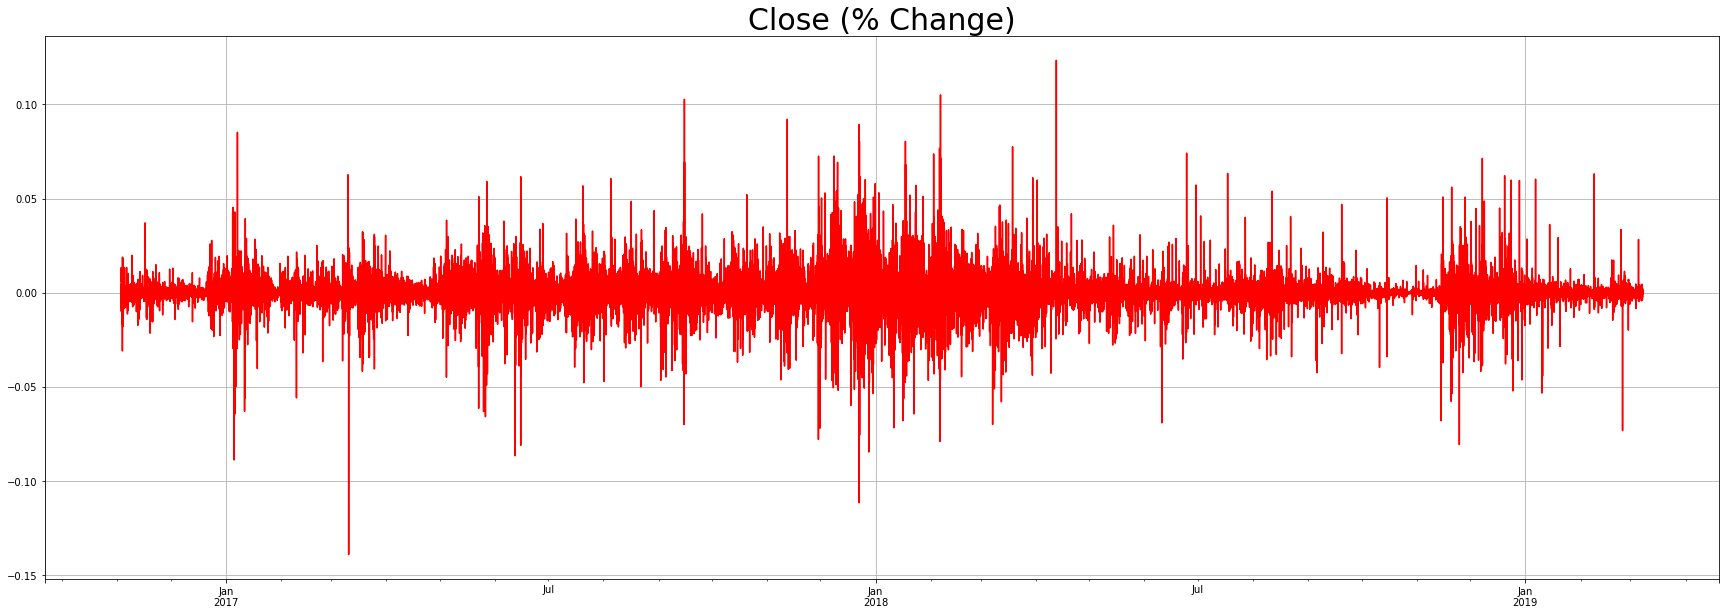

In [19]:
mean = pd.Series(sentiment["dif"]).rolling(window=win).apply(lambda x : np.mean(x))
std = pd.Series(sentiment["dif"]).rolling(window=win).apply(lambda x : np.std(x))
diff_norm = (pd.Series(sentiment["dif"])-mean)/std

rd = pd.merge(pd.DataFrame((data.close).pct_change()), pd.DataFrame(diff_norm), left_index=True, right_index=True).dropna()


plt.figure(figsize=(30,10))
plt.title('Difference of Negative and Positive', fontsize=30)
ax1 = (rd.dif).plot(color='blue', grid=True)
plt.figure(figsize=(30,10))
plt.title('Close (% Change)', fontsize=30)
ax1 = (rd.close).plot(color='red', grid=True)

#h1, l1 = ax1.get_legend_handles_labels()

plt.show()



In [20]:
rd.corr()

,close,dif
close,1.000000,0.109312
dif,0.109312,1.000000


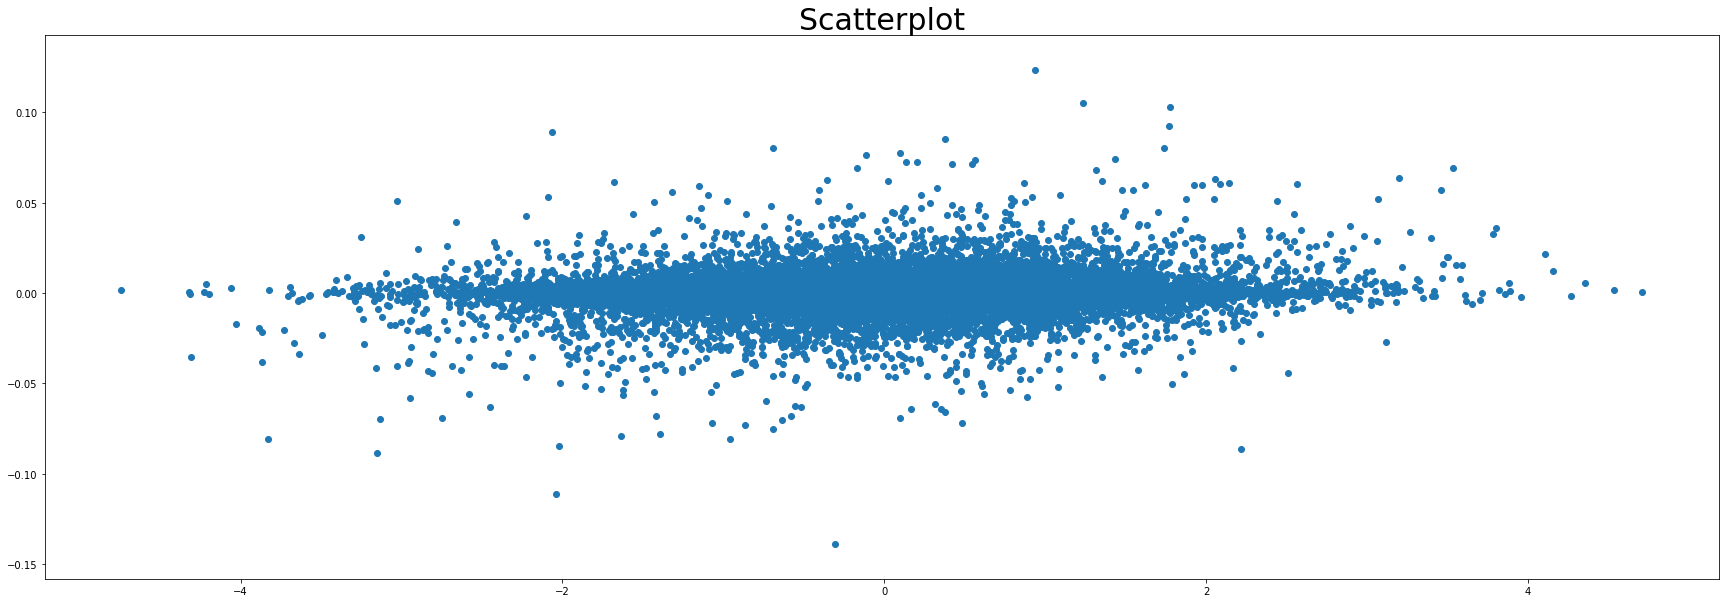

In [21]:
plt.figure(figsize=(30,10))
plt.title('Scatterplot', fontsize=30)
plt.scatter(rd.dif,rd.close)
plt.show()